# Predictive Maintenance for Lithium-Ion Batteries

Predicting Battery End-of-Life: A Data-Driven Approach to Optimize Performance and Reduce Costs.

Lithium-ion batteries are everywhere (phones, laptops, electric vehicles, grid storage). Their failure is not just an inconvenience; it's a safety risk and a significant cost. Replacing batteries too early is wasteful. Letting them run to complete failure can damage the device they're in or cause downtime.

In this project, I analyzed a battery dataset to predict Remaining Useful Life (RUL) for predictive maintenance.


### The Central Question:


Can we accurately predict the Remaining Useful Life (RUL) of a lithium-ion battery based on its charge/discharge characteristics, enabling proactive maintenance and replacement strategies?

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("whitegrid")

### Dataset

In [3]:
df = pd.read_csv('archive/Battery_RUL.csv')
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


#### Data Statistics

In [4]:
print("Dataset shape :", df.shape)
df.describe()

Dataset shape : (15064, 9)


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [5]:
df.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

Our dataset has no missing values.

### Visualize the Target Variable (RUL)

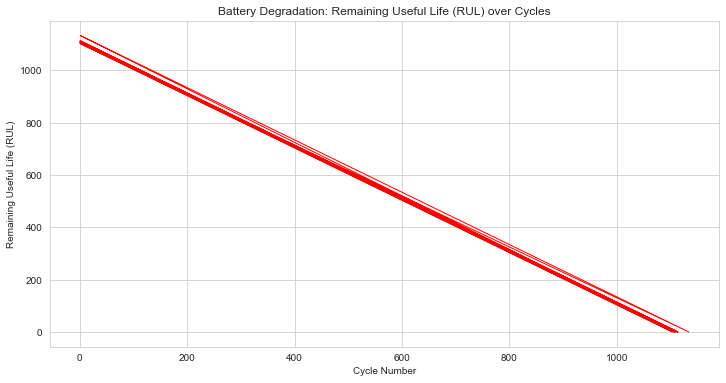

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Cycle_Index'], df['RUL'], color='red', linewidth=1)
plt.title('Battery Degradation: Remaining Useful Life (RUL) over Cycles')
plt.xlabel('Cycle Number')                                                 
plt.ylabel('Remaining Useful Life (RUL)')                                  
plt.show()                                                                 

According to the results shown, we can notice that the cycle number of a battery is linked to its remaining useful life.

### Correlation matrix (heat map)

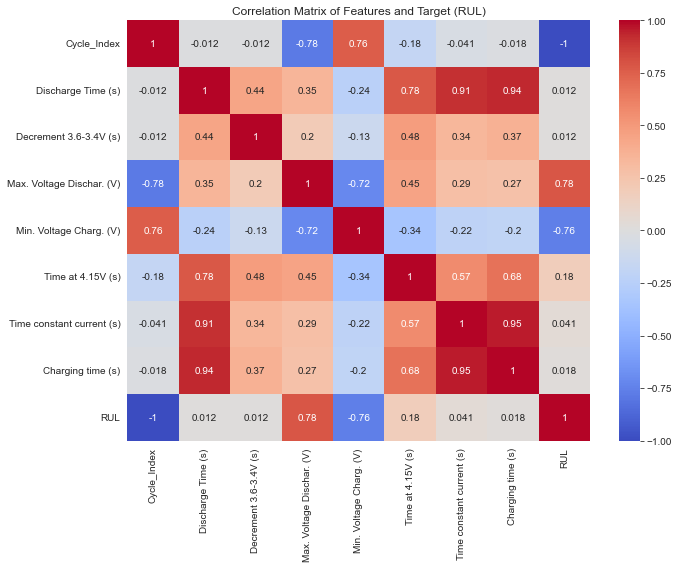

In [50]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features and Target (RUL)')
plt.tight_layout()
plt.show()

Focusing on RUL Row or Column, we are looking for features that have the strongest negative correlation with RUL.
can notice:

    Cycle_Index vs RUL = -1.00 (Perfect negative correlation)
    Min. Voltage Charg. (V) vs RUL ≈ -0.76 (Strong negative correlation)
    
    → As cycle count increases, RUL decreases (makes perfect sense, since more cycles mean aging).
    → As the minimum charging voltage increases, RUL decreases.

These two are the most important indicators of battery degradation in your dataset.
Other features (like Discharge Time, Charging Time, etc.) have correlations very close to zero, so they don’t directly explain much about RUL.

### Key relationships scatter plot

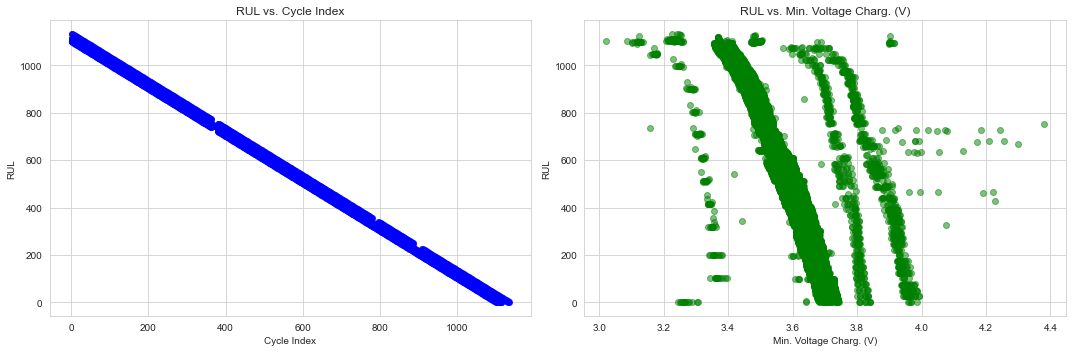

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: RUL vs. Cycle index
ax1.scatter(df['Cycle_Index'], df['RUL'], alpha=0.5, color='blue')
ax1.set_title('RUL vs. Cycle Index')
ax1.set_xlabel('Cycle Index')
ax1.set_ylabel('RUL')

# Plot 2: RUL vs. Min voltage charg.
ax2.scatter(df['Min. Voltage Charg. (V)'], df['RUL'], alpha=0.5, color='green')
ax2.set_title('RUL vs. Min. Voltage Charg. (V)')
ax2.set_xlabel('Min. Voltage Charg. (V)')
ax2.set_ylabel('RUL')

plt.tight_layout()
plt.show()

The scatter plots visually confirm the strong linear relationship between these key features and RUL. The trend is clear, with relatively low noise, suggesting these are robust predictors for a model.

## Predictive Modeling

It's time to build our predictive model that will help us predict the RUL of a battery using the variables we have in our dataset.

We will build two models: a simple Linear Regression as a baseline, and a more powerful Random Forest Regressor.

We will not be using Cycle Index as an input feature since it will generate a data leak.
The Cycle Index (the current cycle number) and the RUL (cycles until failure) are directly mathematically linked.
    
    RUL = Total Life - Cycle Index

If we add Cycle Index as an input, our model won't learn much but will simply apply this formula to get to the result.
Thus, removing Cycle Index will help our model learn and predict without having to depend on Cylcle Index input.




In [41]:
from sklearn.model_selection import train_test_split

# Define feature set (X) and target (y)
X = df[['Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)']]
y = df['RUL']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (12051, 7)
Testing features shape: (3013, 7)
Training target shape: (12051,)
Testing target shape: (3013,)


### Build and Train a Baseline Model (Linear Regression)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create the model object
lin_reg_model = LinearRegression()

# Train the model on the training data
lin_reg_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred_lin = lin_reg_model.predict(X_test)

# Evaluate the model's performance (key metrics)
lin_mae = mean_absolute_error(y_test, y_pred_lin)
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
lin_r2 = r2_score(y_test, y_pred_lin)

print("Linear Regression Model Performance")
print("----------------------------------")
print(f"Mean Absolute Error (MAE): {lin_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lin_rmse:.2f}")
print(f"R-squared (R²): {lin_r2:.4f}")

Linear Regression Model Performance
----------------------------------
Mean Absolute Error (MAE): 96.18
Root Mean Squared Error (RMSE): 163.61
R-squared (R²): 0.7416


This is a very poor model. An MAE of 96 cycles is huge. If a battery lasts 500 cycles, this model is wrong by almost 100 cycles on average.

The R² of 0.74 means it only captures about 75% of the variance in RUL.

Conclusion: The relationship between the battery's performance metrics and its RUL is highly complex and non-linear. A simple linear model is completely inadequate for this task.

### Build and Train a More Advanced Model (Random Forest)

In [39]:
from sklearn.ensemble import RandomForestRegressor

# `random_state=42` for reproducible results.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Model Performance")
print("------------------------------")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R-squared (R²): {rf_r2:.4f}")


Random Forest Model Performance
------------------------------
Mean Absolute Error (MAE): 11.07
Root Mean Squared Error (RMSE): 27.62
R-squared (R²): 0.9926


This is an exceptionally good model. An R² of 0.99 is outstanding. This means that our model explains 99.26% of the variance in RUL.

An MAE of ~11 cycles is very strong. This means we could predict a battery's failure very early.

Conclusion: The Random Forest algorithm is perfectly suited to capture the complex, non-linear degradation patterns of the lithium-ion battery.

### Visualize the Model's Performance

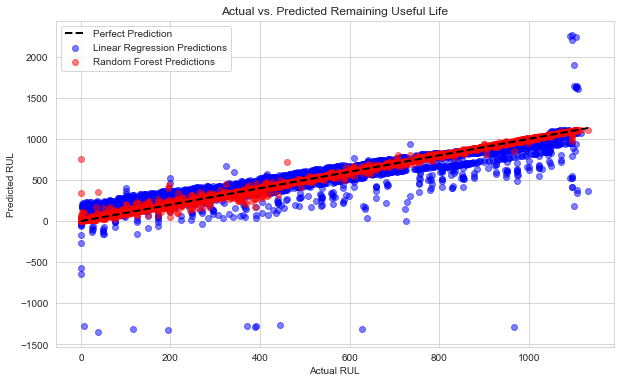

In [37]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue', label='Linear Regression Predictions')
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='red', label='Random Forest Predictions')

perfect_line = [y_test.min(), y_test.max()]
plt.plot(perfect_line, perfect_line, 'k--', label='Perfect Prediction', lw=2)

plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted Remaining Useful Life')
plt.legend()
plt.show()

We can see a clear difference between Linear Regression Predictions and Random Forest Predictions.

### Feature Importance

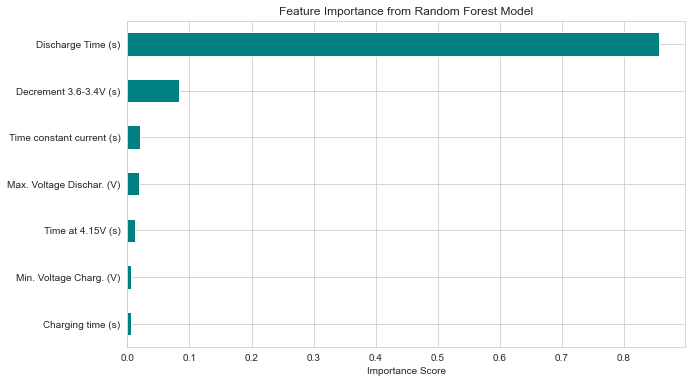

In [34]:
feature_importances = rf_model.feature_importances_

importance_series = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importance_series.plot(kind='barh', color='teal') # Horizontal bar chart
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()

As we noted earlier in our correlation matrix, Min. Voltage Charg. had a strong negative correlation versus RUL.
We mentioned that it was a the most important indicators of battery degradation in our dataset while Discharge Time had a very low correlation close to zero, so they don’t directly explain much about RUL.

Well then why does our Feature importance from Random Forest Model shows us that Discharge Time (s) is the most important feature while Min. Voltage Charg. (V) scored a very low importance?

To answer this question, it is important to note that correlation measures only Linear Relationships.
Meanwhile, Random Forest is a powerful non-linear model. It doesn't just fit straight lines; it creates a complex series of decision rules (like a flow chart) to make predictions.

This makes sense from a physics perspective. A battery's capacity to hold charge (directly related to discharge time) is a fundamental indicator of its health, but its degradation isn't linear, it's often stable for most of its life before a sharp drop-off at the end. The Random Forest model is particularly adept at capturing these complex, real-world non-linear relationships that simple correlation statistics can miss.

# Conclusion

This project successfully demonstrates a data-driven framework for battery health monitoring. By monitoring just a few key voltage and current characteristics, we can accurately predict end-of-life.

This allows for:

Reduced Costs: Replacing batteries only when needed, not on a fixed schedule.

Increased Safety: Preventing unexpected failure in critical devices.

Improved Customer Experience: Notifying users to replace a battery before it fails.